# **¡Adivina el número!**

#### Realizado por: *Álvaro Heras Pérez*

In [1]:
# Bloque para escribir el menú con una subrutina.

def Menu(): 
    print("1️⃣  Partida modo solitario")
    print("    👤 Juega tú solo contra el ordenador ¿Podrás vencerle?\n")

    print("2️⃣  Partida de dos jugadores")
    print("    🎮 Un jugador pone el número secreto… ¡y el otro intenta adivinarlo! ¿Os atrevéis?\n")

    print("3️⃣  📊 Estadísticas")
    print("    🏆 Elige esta opción para visualizar el historial de partidas y ver quién es el campeón de campeones.\n")

    print("4️⃣  🚪 Salir")
    print("    👋 Cierra el juego y vuelve al mundo real… si quieres.\n")

In [2]:
# Bloque dificultad e intentos.

def Dificultad():
    print("\n🎮⚙️ Ahora hay que elegir la dificultad del juego:")
    print("1️⃣ 🌿 Fácil (20 intentos)")
    print("2️⃣ ⚡ Medio (12 intentos)")
    print("3️⃣ 💀 Difícil (5 intentos)")
    print("4️⃣ ↩️ Volver al menú principal\n")

    # Bloque para que solo introduzca 1, 2, 3 o 4.
    n_dificultad = 0  # Para que entre al menos una vez al while
    while n_dificultad not in (1, 2, 3, 4):
        entrada = input("🎮🔢 Introduce un número del 1 al 4 en función de la dificultad e intentos: ").strip() 
        try:
            n_dificultad = int(entrada)
        except ValueError:
            print("⚠️🔢 Debes introducir un número, las letras o caracteres no son aceptados.")
            continue
        if n_dificultad not in (1, 2, 3, 4):
            print("⚠️  El número debe ser 1, 2, 3 o 4. Vuelve a intentarlo.")

    # Si elige 4, volver al menú principal
    if n_dificultad == 4:
        print("\n↩️🏠 Volviendo al menú principal...\n")
        return None, None  # SIEMPRE devolvemos dos valores

    # Asignar intentos y texto de dificultad
    if n_dificultad == 1:
        intentos = 20
        dificultad_txt = "Fácil"
        print("\n🌿✨ Has elegido la dificultad fácil: 20 intentos.")
    elif n_dificultad == 2:
        intentos = 12
        dificultad_txt = "Media"
        print("\n⚡🎯 Has elegido la dificultad media: 12 intentos.")
    else:  # n_dificultad == 3
        intentos = 5
        dificultad_txt = "Difícil"
        print("\n💀🔥 Has elegido la dificultad difícil: 5 intentos.")

    print("\n🎉🔥🎮  ¡¡¡ QUE COMIENCEN LOS JUEGOS !!!  🎮🔥🎉\n")
    
    # Nos guardamos los intentos para jugar y la dificultad para el excel y estadísticas.
    return intentos, dificultad_txt

In [3]:
# Bloque para limitar la elección de número entre el 1 al 1000.
def numero_valido_juego():
    numero = None
    while numero is None:
        entrada = input("🔢➡️ Introduce un número del 1 al 1.000: ").strip()
        if not entrada.isdigit():
            print("⚠️🔢 Debes introducir un numero del 1 al 100, nada de letras o símbolos")
            continue
        valor = int(entrada)
        if valor < 1 or valor > 1000:
            print("⚠️🚫El número no entra en los rangos permitidos.")
            continue
        numero = valor
    return valor

In [4]:
# Bloque para el modo 1 jugador.

def Solitario(intentos, dificultad_txt):
    # Importamos los módulos que he creado para importar el número aleatorio del ordenador, sonidos, frases aleatorias y por rúltimo, modulo para el gif. 
    import Modulo_Solitario
    import Modulo_frases  
    import modulo_sonidos
    from IPython.display import Image, display
    
    n_solitario = Modulo_Solitario.ordenador()
    print(f"\n⚙️🔥Has elegido dificultad: {dificultad_txt}. Tienes {intentos} intentos para adivinar el número.\n")
      
    # Primera oportunidad.
    numero = numero_valido_juego()
    intentos_usados = 1

    # Bucle de la partida hasta que acierte, falle o se quede sin intentos.
    while numero != n_solitario and intentos_usados < intentos:
        if numero > n_solitario:
            print(Modulo_frases.pista_alto())   
        else:
            print(Modulo_frases.pista_bajo())  
        
        modulo_sonidos.sonido_error()
        print("🔄🎯 Todavía te quedan", intentos - intentos_usados, "intentos restantes.\n")
        numero = numero_valido_juego()
        intentos_usados += 1

    # Bloque acabar la partida (ganar o perder).
    if numero == n_solitario:
        modulo_sonidos.sonido_victoria()
        print("\n🎉✅ ¡Has acertado, enhorabuena!")
        print()
        display(Image(filename="Victoria.gif", width=300))
        resultado_partida = "Victoria"
    else:
        print("\n💔😢 Lo siento, has perdido el juego. El número correcto era:", n_solitario)
        print()
        resultado_partida = "Derrota"
        modulo_sonidos.sonido_derrota()
        display(Image(filename="Derrota.gif", width=300))
        
    # Solicitamos nombre del jugador y guardamos datos para el excel.
    nombre_jugador = input("👤💾 Introduce tu nombre para guardar la partida: ")

    registro = generar_registro(
        modo="Solitario",
        dificultad=dificultad_txt,
        nombre=nombre_jugador,
        intentos=intentos_usados,
        resultado=resultado_partida
    )

    guardar_registro_pandas(registro, "estadisticas.xlsx")
    print("El resultado de la partida se ha guardado correctamente.\n")

In [5]:
# Bloque para el modo 2 jugadores.

def Multijugador(intentos, dificultad_txt):
    # Importamos los módulos que he creado para importar el número aleatorio del ordenador, sonidos, frases aleatorias y por último, modulo para el gif. 
    import getpass
    import modulo_sonidos
    import Modulo_frases   
    from IPython.display import Image, display
    
    print("\n🧩🎯 Ahora el primer jugador deberá introducir un número entre 1 y 1000 para que el segundo pueda adivinarlo.\n")

    # Bloque para que el primer jugador introduzca el dígito en secreto con getpass.
    numero_secreto = None
    while numero_secreto is None:
        entrada = getpass.getpass("🕵️‍♂️🔢 Jugador 1, introduce el número secreto (1-1000): ").strip()
        if not entrada.isdigit():
            print("⚠️🔍 Debes introducir un número del 1 al 1000, nada de letras o símbolos.")
            continue
        valor = int(entrada)
        if valor < 1 or valor > 1000:
            print("⚠️🔢 El número no entra en los rangos permitidos (1 a 1000).")
            continue
        numero_secreto = valor

    print("\n" * 2)
    print("👥🎮 Ahora, Jugador 2, intenta adivinar el número.")
    print(f"⚙️🎯 Dificultad elegida: {dificultad_txt}. Tienes {intentos} intentos.\n")

    # Primera oportunidad.
    numero_adivinar = numero_valido_juego()
    intentos_usados = 1  

    # Bucle de la partida hasta que acierte o se quede sin intentos.
    while numero_adivinar != numero_secreto and intentos_usados < intentos:
        if numero_adivinar > numero_secreto:
            print(Modulo_frases.pista_alto())  
        else:
            print(Modulo_frases.pista_bajo())  

        modulo_sonidos.sonido_error()
        print("🔄🎯 Todavía te quedan", intentos - intentos_usados, "intentos restantes.\n")

        numero_adivinar = numero_valido_juego()
        intentos_usados += 1

    # Bloque acabar la partida (ganar o perder).
    if numero_adivinar == numero_secreto:
        print("\nHas acertado, enhorabuena Jugador 2.")
        print()
        display(Image(filename="Victoria.gif", width=300))
        modulo_sonidos.sonido_victoria()
        resultado_partida = "Victoria"
    else:
        print("\n💔😢 Lo siento, has perdido el juego. El número correcto era:", numero_secreto)
        print()
        display(Image(filename="Derrota.gif", width=300))
        modulo_sonidos.sonido_derrota()
        resultado_partida = "Derrota"

    # Bloque para guardar las estadísticas del modo multijugador.
    nombre_jugador = input("👤🎮 Jugador 2, introduce tu nombre para guardar la partida: ").strip()

    registro = generar_registro(
        modo="Multijugador",
        dificultad=dificultad_txt,
        nombre=nombre_jugador,
        intentos=intentos_usados,
        resultado=resultado_partida
    )

    guardar_registro_pandas(registro, "estadisticas.xlsx")
    print("💾✅ El resultado de la partida se ha guardado correctamente.")

In [6]:
# Bloque para guardar las estadísticas de los jugadores y así en un futuro, almacenarlas.

import locale
from datetime import datetime  # importamos la librería datetime para guardar la fecha de las partidas

def generar_registro(modo, dificultad, nombre, intentos, resultado):
    ahora = datetime.now()
    fecha = ahora.strftime("%d-%m-%Y")
    hora = ahora.strftime("%H:%M:%S")

    # Bloque para guardar los datos en el orden deseado.
    registro = [
        fecha,
        hora,
        modo,
        dificultad,
        nombre,
        intentos,
        resultado
    ]
    return registro

In [7]:
# Bloque para generar un excel y guardar las partidas en función de varias columnas de variables.

import pandas as pd
import os

def guardar_registro_pandas(registro, nombre_fichero):
    columnas = [
        "Fecha",
        "Hora",
        "Modo",
        "Dificultad",
        "Nombre jugador",
        "Intentos",
        "Resultado"
    ]

    df_nuevo = pd.DataFrame([registro], columns=columnas)

    if os.path.exists(nombre_fichero):
        df_existente = pd.read_excel(nombre_fichero)
        df_final = pd.concat([df_existente, df_nuevo], ignore_index=True)
    else:
        df_final = df_nuevo

    df_final.to_excel(nombre_fichero, index=False)

══════════ 🎯 ADIVINA EL NÚMERO 🎯 ══════════

1️⃣  Partida modo solitario
    👤 Juega tú solo contra el ordenador ¿Podrás vencerle?

2️⃣  Partida de dos jugadores
    🎮 Un jugador pone el número secreto… ¡y el otro intenta adivinarlo! ¿Os atrevéis?

3️⃣  📊 Estadísticas
    🏆 Elige esta opción para visualizar el historial de partidas y ver quién es el campeón de campeones.

4️⃣  🚪 Salir
    👋 Cierra el juego y vuelve al mundo real… si quieres.



⚠️🔢 Debes introducir un número válido del 1 al 4… ¡nada de otros valores! 🔄


👥🎮 Habéis elegido: Partida 2 Jugadores. ¡Que gane el mejor! 🏆🔥


🎮⚙️ Ahora hay que elegir la dificultad del juego:
1️⃣ 🌿 Fácil (20 intentos)
2️⃣ ⚡ Medio (12 intentos)
3️⃣ 💀 Difícil (5 intentos)
4️⃣ ↩️ Volver al menú principal


⚡🎯 Has elegido la dificultad media: 12 intentos.

🎉🔥🎮  ¡¡¡ QUE COMIENCEN LOS JUEGOS !!!  🎮🔥🎉


🧩🎯 Ahora el primer jugador deberá introducir un número entre 1 y 1000 para que el segundo pueda adivinarlo.




👥🎮 Ahora, Jugador 2, intenta adivinar 

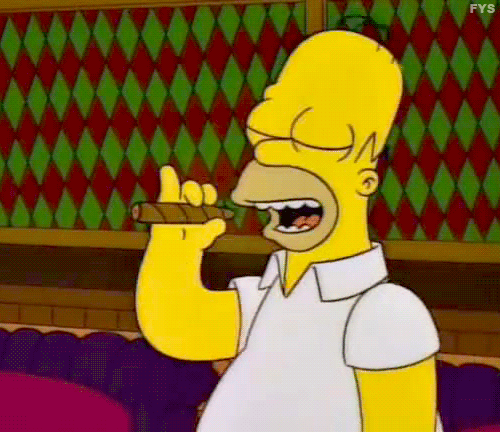

💾✅ El resultado de la partida se ha guardado correctamente.
══════════ 🎯 ADIVINA EL NÚMERO 🎯 ══════════

1️⃣  Partida modo solitario
    👤 Juega tú solo contra el ordenador ¿Podrás vencerle?

2️⃣  Partida de dos jugadores
    🎮 Un jugador pone el número secreto… ¡y el otro intenta adivinarlo! ¿Os atrevéis?

3️⃣  📊 Estadísticas
    🏆 Elige esta opción para visualizar el historial de partidas y ver quién es el campeón de campeones.

4️⃣  🚪 Salir
    👋 Cierra el juego y vuelve al mundo real… si quieres.



⚠️🔢 Debes introducir un número válido del 1 al 4… ¡nada de otros valores! 🔄


👋✨ Has elegido la opción: Salir. ¡Hasta pronto! 🚪🌟


In [8]:
# Bloque para que al acabar las partidas volvamos al menu principal
opcion = 0
while opcion != 4:  # el menú se repite mientras no elija “Salir”

    print("══════════ 🎯 ADIVINA EL NÚMERO 🎯 ══════════\n")
    Menu()
    print()
    
    # Bloque para que solo puedan introducir 1, 2, 3 y 4 y que no se rompa el código.
    opcion_valida = None
    while opcion_valida not in (1, 2, 3, 4): 
        entrada = input("🎮✨ Introduce un número del 1 al 4 para comenzar el juego: ").strip()
        try:
            opcion_valida = int(entrada)
        except ValueError:
            print("\n⚠️🔢 Debes introducir un número válido del 1 al 4… ¡nada de otros valores! 🔄\n")
            continue
        if opcion_valida not in (1, 2, 3, 4):
            print("🔢✨ Debes elegir un número entre 1 y 4. ¡Tú puedes! 💪\n")

    opcion = opcion_valida

    # Opción 1: Solitario
    if opcion == 1:
        print("\n🎮🌟 Has elegido: Partida en modo solitario. ¡Te deseo la mejor de las suertes! 🍀🔥")
        intentos, dificultad_txt = Dificultad()
        if intentos is None:   # han elegido 4 dentro de Dificultad
            continue
        Solitario(intentos, dificultad_txt)

    # Opción 2: Multijugador
    elif opcion == 2:
        print("\n👥🎮 Habéis elegido: Partida 2 Jugadores. ¡Que gane el mejor! 🏆🔥\n")
        intentos, dificultad_txt = Dificultad()
        if intentos is None:
            continue
        Multijugador(intentos, dificultad_txt)  

    # Opción 3: Estadísticas
    elif opcion == 3:
        print("\n📊✨ Has elegido la opción: Estadísticas\n")

        if os.path.exists("estadisticas.xlsx"):
            df = pd.read_excel("estadisticas.xlsx")
            print("\n📊💾 Estadísticas de partidas guardadas:")
            try:
                display(df)  # si estás en Jupyter
            except:
                print(df.to_string(index=False))
        else:
            print("\nℹ️📭 No hay estadísticas registradas todavía. ¡Juega una partida primero! 🎮✨")
        
        input("\n↩️✨ Introduce cualquier tecla para volver al menú...")

    # Opción 4: Salir
    else:
        print("\n👋✨ Has elegido la opción: Salir. ¡Hasta pronto! 🚪🌟")